## Notebook for the Viszualization of Variance Acounted For for by 1H Model

ToDo:
    - Documentation
    - fix paths

In [1]:
import pandas as pd
import os
import errno  # handy system and path functions
import sys  # to get file system encoding
import glob
import locale
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.linalg
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import rcParams
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
         'figure.autolayout': True}
rcParams.update(params)
from scipy import signal
from scipy import stats
from sklearn import preprocessing

# np.set_printoptions(precision=28)
# pd.set_option('precision', 28)


# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('colorblind')

/home/michael/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# # Set the style globally

# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 12
# plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.dpi'] = 300

In [4]:
dir_ = '/home/michael/Desktop/model_evd/1H/*'
df_r1 = pd.DataFrame()
subjects_info = pd.DataFrame()
path = '/home/michael/Desktop/model_evd/1H/group_level/'
df_vafs = pd.DataFrame()
df_sub_5 = pd.DataFrame()
df_sub_07 = pd.DataFrame()
df_sub_12 = pd.DataFrame()
df_sub_left = pd.DataFrame()
df_sub_right = pd.DataFrame()

handedness = 'r'
for subject in (glob.glob(dir_)):
    subject_id = subject.split('/')[-1]
    print(subject_id)

    for filename in (glob.glob(subject+'/*')):
        pos_name = filename.split('/')[-1]
        print(pos_name)

        for x in (glob.glob(filename+'/*')):
            if x.split('_')[-1] == 'vaf.csv':
    #                 print('info')

                VAF = pd.read_csv(x)

        if pos_name == 'r1':
#             r1_logPD = logPD
            r1_vaf = VAF
        elif pos_name == 'r2':
#             r2_logPD = logPD
            r2_vaf = VAF
        elif pos_name == 'r3':
#             r3_logPD = logPD
            r3_vaf = VAF
        elif pos_name == 'm1':
#             m1_l_logPD = logPD
            m1_vaf = VAF
        elif pos_name == 'm2':
#             m2_l_logPD = logPD
            m2_vaf = VAF
        elif pos_name == 'm3':
#             m3_l_logPD = logPD
            m3_vaf = VAF
        elif pos_name == 'l1':
#             l1_logPD = logPD
            l1_vaf = VAF
        elif pos_name == 'l2':
#             l2_logPD = logPD
            l2_vaf = VAF
    #             print('l2')
        elif pos_name == 'l3':
#             l3_logPD = logPD
            l3_vaf = VAF
    #             print('here')
    df_vafs[subject_id+'_'+'r1'] = r1_vaf['0']
    df_vafs[subject_id+'_'+'r2'] = r2_vaf
    df_vafs[subject_id+'_'+'r3'] = r3_vaf

    df_vafs[subject_id+'_'+'m1'] = m1_vaf
    df_vafs[subject_id+'_'+'m2'] = m2_vaf
    df_vafs[subject_id+'_'+'m3'] = m3_vaf


    df_vafs[subject_id+'_'+'l1'] = l1_vaf
    df_vafs[subject_id+'_'+'l2'] = l2_vaf
    df_vafs[subject_id+'_'+'l3'] = l3_vaf


sub-07
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-01
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-05
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-06
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-12
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-04
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-09
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-03
r1
m2
r3
l3
m1
l1
m3
r2
l2
group_level
sub-07_model_evidences.png
pcs
sub-03_model_evidences.png
sub-01_vafs.png
sub-02_vafs.png
vaf
sub-05_vafs.png
sub-06_model_evidences.png
sub-05_model_evidences.png
sub-04_model_evidences.png
sub-11_model_evidences.png
sub-10_model_evidences.png
sub-08_model_evidences.png
vts
sub-08_vafs.png
sub-11_vafs.png
me
sub-03_vafs.png
sub-02_model_evidences.png
sub-01_model_evidences.png
sub-12_model_evidences.png
sub-12_vafs.png
sub-10_vafs.png
sub-09_vafs.png
sub-07_vafs.png
sub-06_vafs.png
sub-04_vafs.png
sub-09_model_evidences.png
sub-08
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-11
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-10
r1
m2
r3
l3
m1
l1
m3
r2
l2
sub-02
sub-02_r2_singular_values.png
sub-02_m1_singular_var_explained.png
sub-02_m1

In [5]:
df_vafs

,sub-07_r1,sub-07_r2,sub-07_r3,sub-07_m1,sub-07_m2,sub-07_m3,sub-07_l1,sub-07_l2,sub-07_l3,sub-01_r1,...,sub-10_l3,sub-02_r1,sub-02_r2,sub-02_r3,sub-02_m1,sub-02_m2,sub-02_m3,sub-02_l1,sub-02_l2,sub-02_l3
0,0.906043,0.843671,0.885639,0.906990,0.940238,0.933745,0.920390,0.812435,0.945508,0.697713,...,0.944937,0.840856,0.576631,0.720747,0.690133,0.735139,0.782537,0.868781,0.829040,0.777308
1,0.957733,0.952256,0.962798,0.965969,0.983068,0.980299,0.957583,0.899968,0.971587,0.868453,...,0.973697,0.916782,0.795697,0.873539,0.855007,0.899382,0.915676,0.960026,0.916550,0.916769
2,0.985085,0.977002,0.989096,0.988385,0.991628,0.989380,0.986652,0.973703,0.993046,0.946574,...,0.986703,0.964783,0.907801,0.958183,0.927355,0.947275,0.962150,0.981932,0.970621,0.960369
3,0.993117,0.987022,0.993511,0.992923,0.995298,0.994182,0.996378,0.987047,0.996863,0.974991,...,0.994203,0.977137,0.946240,0.977027,0.955650,0.967105,0.976750,0.990394,0.983590,0.979031
4,0.996737,0.993476,0.996973,0.997119,0.997898,0.997949,0.998362,0.994449,0.998756,0.986156,...,0.997006,0.988670,0.973018,0.988894,0.978119,0.981673,0.989559,0.995387,0.990905,0.989681
5,0.999186,0.998979,0.999350,0.999230,0.999296,0.999447,0.999444,0.998545,0.999584,0.993982,...,0.998756,0.996424,0.991441,0.997347,0.990969,0.994122,0.997033,0.998638,0.996345,0.997042
6,0.999487,0.999372,0.999692,0.999523,0.999660,0.999701,0.999726,0.999186,0.999817,0.996231,...,0.999478,0.998072,0.996536,0.998541,0.994450,0.997011,0.998478,0.999258,0.998002,0.998494
7,0.999724,0.999651,0.999825,0.999784,0.999854,0.999886,0.999888,0.999676,0.999926,0.997974,...,0.999721,0.999000,0.998613,0.999224,0.997366,0.998144,0.999069,0.999550,0.998642,0.999145
8,0.999838,0.999807,0.999913,0.999877,0.999922,0.999934,0.999924,0.999823,0.999955,0.998949,...,0.999854,0.999366,0.999164,0.999604,0.998431,0.999088,0.999498,0.999814,0.999179,0.999680
9,0.999907,0.999895,0.999961,0.999922,0.999969,0.999970,0.999953,0.999910,0.999978,0.999327,...,0.999945,0.999661,0.999573,0.999816,0.999105,0.999520,0.999778,0.999945,0.999595,0.999888


In [6]:
df_vaf_mean = df_vafs.mean(axis=1)

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


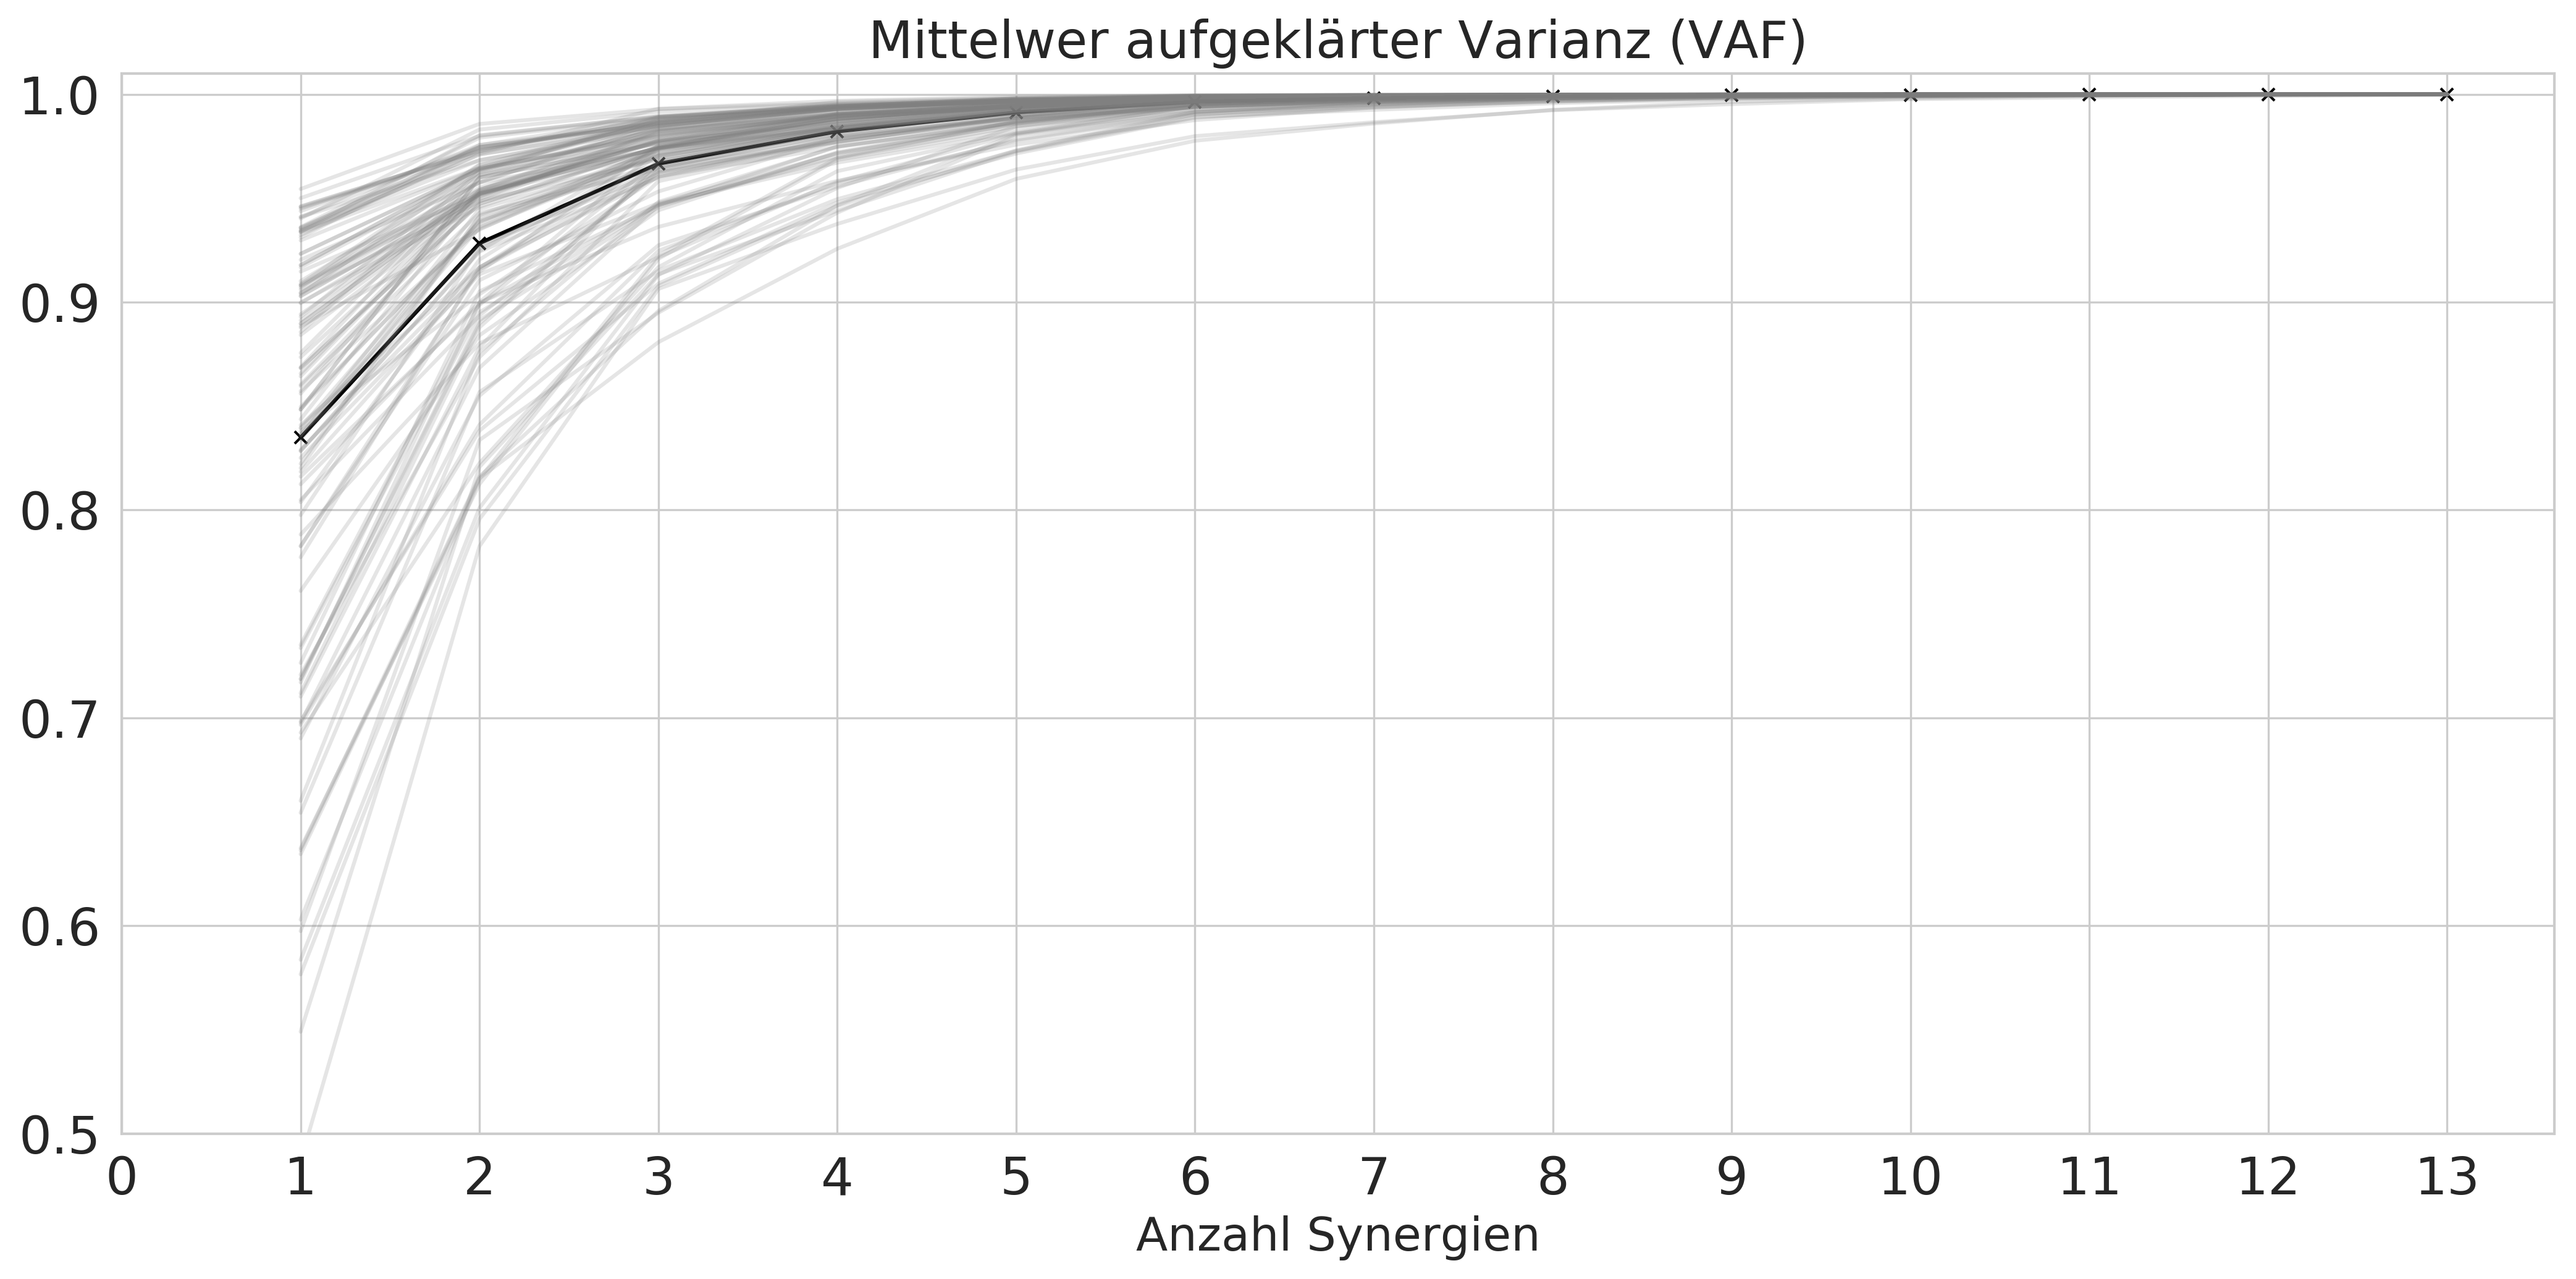

Subject Done!!


In [10]:
fig = plt.figure(figsize=(14,7))
plt.title('Aufgeklärte Varianz ',fontsize=16)
plt.plot(range(1,len(df_vaf_mean)+1), df_vaf_mean,marker='x',linewidth=1.5, alpha=1, color='black', label='Mittlere aufgeklärte Varianz')

for i in df_vafs.columns:
    plt.plot(range(1,len(df_vafs[i])+1), df_vafs[i],linewidth=1.5, alpha=0.2, color='grey')

plt.xticks(np.arange(0, (len(r1_vaf)+1), 1))
# plt.yticks(np.arange(0.7, 1, 0.1))

plt.xlabel('Anzahl Synergien')
plt.title('Mittelwer aufgeklärter Varianz (VAF)')
# plt.legend()
plt.ylim(.5,1.01)
# fig.savef6g(path+'vafs/'+subject_id+'_vafs.png')
plt.show()
print('Subject Done!!')